# Submission for the AIcrowd Blitz Challenge ORIENTME

Author - Animesh Sinha

Based off template by - Sharada Mohanty
 

Link to the official colab notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/5ef00d22288220f0e87e73b74ce55a13)


# Getting the Data

## Download data
The first step is to download the training data and the test data

In [1]:
# #Donwload the datasets
!rm -rf data/
!mkdir data/

!curl https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/training.tar.gz -o data/training.tar.gz
!curl https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/test.tar.gz -o data/test.tar.gz
!curl https://sdownload3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/orientme/v0.2/sample_submission.csv -o data/sample_submission.csv
!tar xvzf data/training.tar.gz -C data/
!tar xvzf data/test.tar.gz -C data/

Streaming output truncated to the last 5000 lines.
images/008254.jpg
images/007167.jpg
images/008532.jpg
images/007601.jpg
images/005016.jpg
images/005002.jpg
images/008526.jpg
images/007615.jpg
images/009638.jpg
images/008240.jpg
images/007173.jpg
images/005764.jpg
images/006245.jpg
images/009176.jpg
images/008268.jpg
images/005994.jpg
images/006523.jpg
images/009610.jpg
images/007629.jpg
images/006537.jpg
images/009604.jpg
images/005980.jpg
images/005758.jpg
images/006251.jpg
images/009162.jpg
images/008297.jpg
images/009189.jpg
images/009837.jpg
images/009823.jpg
images/008283.jpg
images/005957.jpg
images/007198.jpg
images/006286.jpg
images/007826.jpg
images/007832.jpg
images/006292.jpg
images/005943.jpg
images/005214.jpg
images/007403.jpg
images/008730.jpg
images/007365.jpg
images/008056.jpg
images/009348.jpg
images/005572.jpg
images/005566.jpg
images/007371.jpg
images/008042.jpg
images/006709.jpg
images/007417.jpg
images/008724.jpg
images/005200.jpg
images/009412.jpg
images/006721

In [0]:
## Now the data is available at the following locations:

TRAINING_IMAGES_FOLDER = "data/training/images/"
TRAINING_LABELS_PATH = "data/training/labels.csv"
TEST_IMAGES_FOLDER = "data/images"
SAMPLE_SUBMISSION_FILE_PATH = "data/sample_submission.csv"


## Import packages

In [3]:
import os
import tqdm

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image 
import cv2 as cv
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data
We use PIL library to load our images. Here we are creating our array where our input features are the mean colours and output features are the rotations along the x axis.

In [4]:
training_labels_df = pd.read_csv(TRAINING_LABELS_PATH)
training_labels_df.sort_values("xRot", inplace=True)
training_labels_df.head()

,filename,xRot
3347,003347.jpg,0.141806
3263,003263.jpg,0.146206
3002,003002.jpg,0.319200
3399,003399.jpg,0.377267
1722,001722.jpg,0.409515


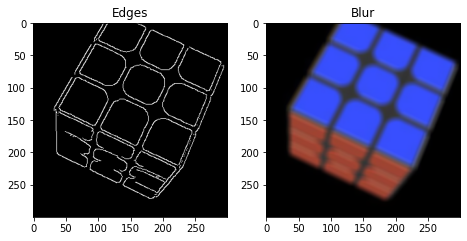

In [5]:
def pre_process_data_X(im):
    """
    This file takes a loaded image and returns a particular 
    representation of the data point
    
    
    NOTE: This current baseline implements a **very** silly approach
    of representing every image by the mean RGB values for every image.
    
    You are encourage to try to alternate representations of the data,
    or figure out how to learn the best representation from the data ;)
    """
    im_rgb = cv.blur(np.array(im), (5, 5))
    im_hsv = cv.cvtColor(im_rgb, cv.COLOR_BGR2HSV)
    im_mean = np.sum(im_rgb, axis=2)
    fl = [
        cv.Canny(im_rgb, 100, 200),
        cv.blur(np.array(im), (10, 10)),
    ]
    crop = ((120, 420), (100, 400))
    for i in range(len(fl)):
        fl[i] = fl[i][crop[0][0]:crop[0][1], crop[1][0]:crop[1][1]]
    return fl

row = training_labels_df.iloc[1298]
filepath = os.path.join(
    TRAINING_IMAGES_FOLDER,
    row.filename
)
img = Image.open(filepath)
filters = pre_process_data_X(img)
labels = ["Edges", "Blur"]
plt.figure(figsize=(16, 8))
plt.axis('off')
for i in range(len(filters)):
    plt.subplot(2, 4, i + 1)
    plt.title(labels[i])
    plt.imshow(filters[i], cmap='gray')

In [0]:
# ALL_DATA = []

# for _idx, row in tqdm.tqdm(training_labels_df.iterrows(), total=training_labels_df.shape[0]):
#     filepath = os.path.join(
#         TRAINING_IMAGES_FOLDER,
#         row.filename
#     )
#     im = Image.open(filepath)
    
#     data_X_frame, data_X_image = pre_process_data_X(im)
#     data_Y = [row.xRot]
    
#     ALL_DATA.append((data_X_frame, data_X_image, data_Y))

# Data Analysis and Split

## Exploratory Data Analysis
We now see the kind of images the dataset contains to get a better idea. The title signifies clockwise rotation of the cube along the x axis

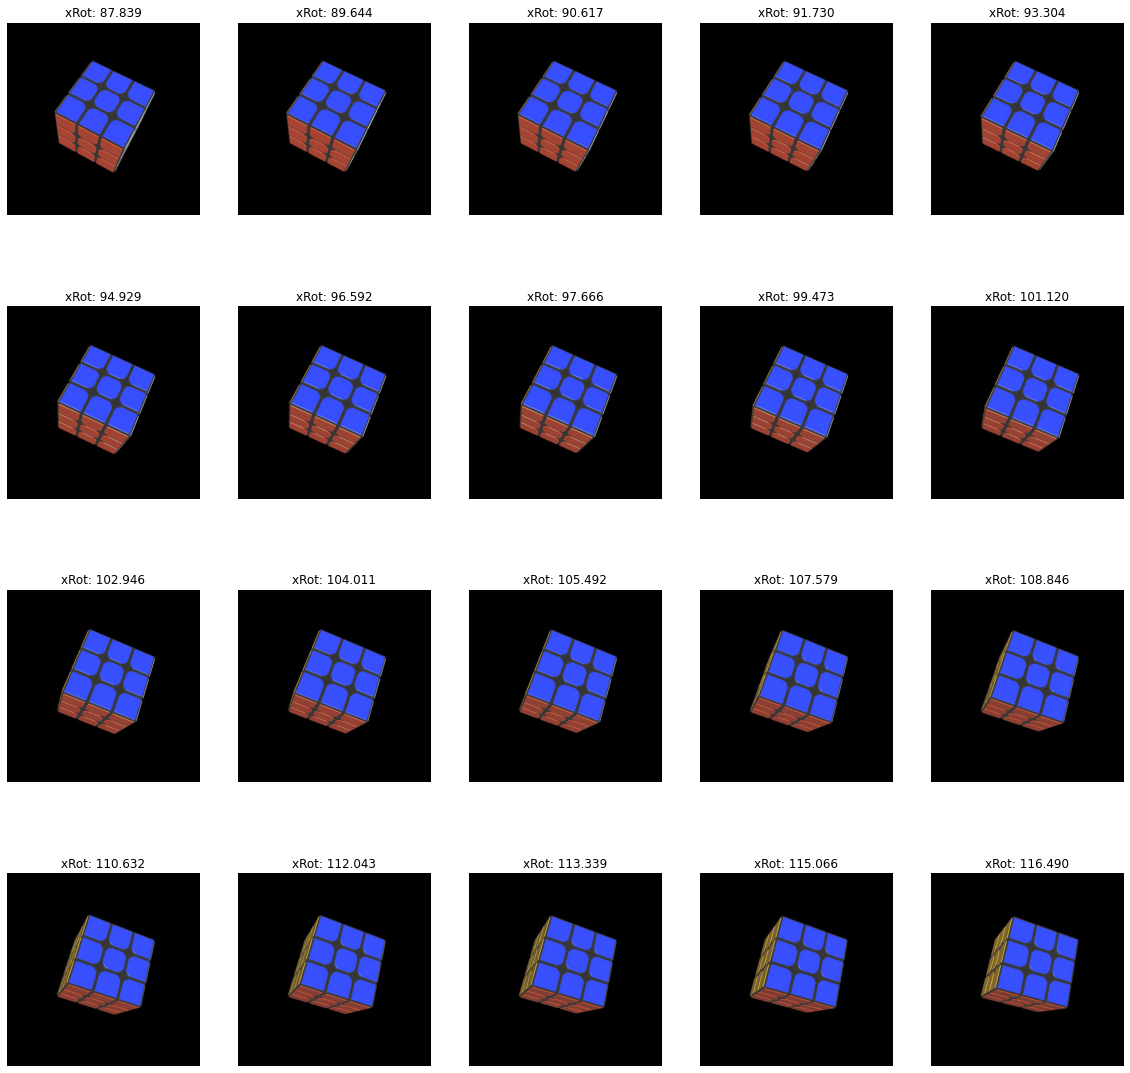

In [7]:
plt.figure(figsize=(20,20))

step = 20
cnt = 20
start = 1200
for i in range(start, start + cnt * step, step):
  filename,xRot = training_labels_df.iloc[i]
  filepath = os.path.join(
        TRAINING_IMAGES_FOLDER,
        filename
    )
  im = Image.open(filepath)
  plt.subplot(4, 5, (i - start) // step + 1)
  plt.axis('off')
  plt.title("xRot: %.3f"%(xRot))
  plt.imshow(im)

## Split Data into Train and Validation
We split the dataset into Training data and Validation datasets to help us test the generalizability of our models, and to ensure that we are not overfitting on the training set.

In [0]:
# training_set, validation_set = train_test_split(ALL_DATA, test_size=0.2, random_state=42) 

Here we have selected the size of the testing data to be 20% of the total data. You can change it and see what effect it has on the accuracies. To learn more about the train_test_split function [click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Now, since we have our data splitted into train and validation sets, we need to get the label separated from the data.

In [0]:
# X_train_frame, X_train_image, y_train = zip(*training_set)
# X_val_frame, X_val_image, y_val = zip(*validation_set)

# X_train_frame, X_train_image = np.array(X_train_frame), np.array(X_train_image)
# y_train = np.array(y_train)
# X_val_frame, X_val_image = np.array(X_val_frame), np.array(X_val_image)
# y_val = np.array(y_val)

In [0]:
# print(X_val_frame.shape, X_train_image.shape, y_train.shape)
# print(X_val_frame.shape, X_val_image.shape, y_val.shape)

# Comparator Model

## Loading Training data

In [0]:
labels = pd.read_csv(TRAINING_LABELS_PATH)
N_train = len(labels)

X = []
for img_name in tqdm.tqdm(labels.filename, total=N_train):
    filepath = os.path.join(TRAINING_IMAGES_FOLDER, img_name)
    X.append(get_img(filepath))
X = np.array(X)

## Answering the Test

In [0]:
def get_img(img_path):
    with Image.open(img_path) as img:
        img = np.array(img)[90:-90, 90:-90]
    img = img & ~127
    return img.astype("?")

In [0]:
test_files = os.listdir(TEST_IMAGES_FOLDER)
N_test = len(test_files)

Z = []
for img_name in tqdm.tqdm(test_files, total=N_test):
    filepath = os.path.join(TEST_IMAGES_FOLDER, img_name)
    Z.append(get_img(filepath))
Z = np.array(Z)

In [0]:
with open("submission.csv", "a+") as _f:
    _f.write(f"filename, xRot\n")

In [0]:
for img in tqdm.tqdm(Z, total=N_test):
    index = np.sum(X ^ img, axis=(1, 2, 3)).argmin()
    with open("submission.csv", "a+") as _f:
        _f.write(f"{img_name}, {labels.xRot[index]}\n")

# Neural Net Model

## Define the Classifier
Now we finally come to the juicy part. 
Now that all the data is all loaded and available nice, we can finally get to training the classifier. Here we use sklearn [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to train our network. We can tune the hyper parameters based on cross validation scores 

In [0]:
# import tensorflow as tf


# def make_model():
#     img_size = (300, 300)
    
#     input_frame = tf.keras.layers.Input(shape=img_size+(1,))
#     frame_net = tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu')(input_frame)
#     frame_net = tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), padding='same', activation='relu')(frame_net)
#     frame_net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(frame_net)
#     frame_net = tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), padding='same', activation='relu')(frame_net)
#     frame_net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(frame_net)
#     frame_net = tf.keras.layers.Flatten()(frame_net)
#     frame_net = tf.keras.layers.Dense(36, activation='relu')(frame_net)

#     input_image = tf.keras.layers.Input(shape=img_size+(3,))
#     image_net = tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation='relu')(input_image)
#     image_net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(image_net)
#     image_net = tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), padding='same', activation='relu')(image_net)
#     image_net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(image_net)
#     image_net = tf.keras.layers.Flatten()(image_net)
#     image_net = tf.keras.layers.Dense(20, activation='relu')(image_net)

#     merged = tf.keras.layers.Concatenate(axis=1)([image_net, frame_net])
#     output = tf.keras.layers.Dense(20, activation='relu')(merged)    
#     output = tf.keras.layers.Dense(1)(output)

#     model = tf.keras.models.Model(inputs=[input_frame, input_image], outputs=output)
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

# model = make_model()
# model.summary()

## Train the classifier

In [0]:
# model.fit([X_train_frame, X_train_image], y_train, 
#           validation_data=([X_val_frame, X_val_image], y_val), 
#           epochs=50,
#           callbacks = [tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)])

## Predict on Validation
Now we predict our trained classifier on the validation set and evaluate our model

In [0]:
# model = tf.keras.models.load_model('best_model.h5')
# y_pred = model.predict([X_val_frame, X_val_image])

## Evaluate the Performance
We use the same metrics as that will be used for the test set.  
[MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) and [RMSE](https://www.statisticshowto.com/rmse/) are the metrics for this challenge

In [0]:
# print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))  
# print('Mean Squared Error:', mean_squared_error(y_val, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_pred)))

## Clear out the Memory

Training is complete, so we need to make space for Test data in the RAM.

In [0]:
# del X_train_frame, X_train_image, y_train, X_val_frame, X_val_image, y_val
# del training_set, validation_set, ALL_DATA, training_labels_df

# Load Test Set
Load the test data now

In [0]:
# import glob

# TEST_DATA_FRAME = []
# TEST_DATA_IMAGE = []
# TEST_FILENAMES = []

# for _test_image_path in tqdm.tqdm(glob.glob(os.path.join(TEST_IMAGES_FOLDER, "*.jpg"))):
#     filename = os.path.basename(_test_image_path)
#     im = Image.open(_test_image_path)
    
#     data_X_frame, data_X_image = pre_process_data_X(im)
#     TEST_DATA_FRAME.append(data_X_frame)
#     TEST_DATA_IMAGE.append(data_X_image)
#     TEST_FILENAMES.append(filename)

In [0]:
# TEST_DATA_IMAGE = np.array(TEST_DATA_IMAGE)
# TEST_DATA_FRAME = np.array(TEST_DATA_FRAME)
# # model = classifier

## Make predictions on the test set

In [0]:
# test_predictions = model.predict([TEST_DATA_FRAME, TEST_DATA_IMAGE])

In [0]:
# test_df = pd.DataFrame(test_predictions, columns=['xRot'])
# test_df["filename"] = TEST_FILENAMES

## Save the prediction to csv

In [0]:
# test_df.to_csv('submission.csv', index=False)

**Note**: Do take a look at the submission format.The submission file should contain the following header : `filename,xRot`.

## Save it in correct format

To download the generated csv in Google Colab run the below command

In [0]:
from google.colab import files
files.download('submission.csv')

Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/orientme). Participate in the challenge and submit the submission.csv.